<font size="5">

# Multi-Grid measurements at LET, 2022
    
  

> __Author:__ A. Backis
<br/>__Institute:__ University of Glasgow (UoG), European Spallation Source (ESS)
    
> __Author:__ R. Wahlén
<br/>__Institute:__ Lund University (LU), European Spallation Source (ESS)

>__Date:__ 7/4-2022
    
_Abstract:_
This notebook contains the data-analysis tools used for the measurements at the LET instrument at ISIS. It describes how the analysis was performed, and summarizes the results.

# Contents
    
* [1. Introduction](#INTRODUCTION)
    * [1.1 Packages](#PACKAGES)
    * [1.2 Parameters](#PARAMETERS)
* [2. STF](#STF)

# 1. Introduction<a class="anchor" id="INTRODUCTION"></a>

Notebook showing the analysis of the LET measurements.

## 1.1 Packages<a class="anchor" id="PACKAGES"></a>

Import required packages.

In [24]:
# Autoload packages when doing an external change
%load_ext autoreload
%autoreload 2

# Activate matplotlib in interactive notebook mode
%matplotlib widget

# General packages
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure custom packages can be reached
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Local packages
#import file_handling.mg_seq.mg_seq_manage as mg_manage
#import file_handling.he3_read as he3_read
#import file_handling.bm_read as bm_read
import file_handling.mg_ref.mg_ref_read as mg_read
import file_handling.mg_ref.mg_ref_manage as mg_manage

import plotting.mg_ref_basic_plot as mg_basic_plot
#import plotting.he3_basic_plot as he3_basic_plot
#import plotting.bm_basic_plot as bm_basic_plot
#import plotting.lineshape as lineshape

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1.2 Parameters<a class="anchor" id="PARAMETERS"></a>

Define global parameters.

In [53]:
# Instrument definition
MODERATOR_TO_SAMPLE_IN_M = 25

# Paths to folders containing data
nb_path = os.getcwd()
MG_RAW_FOLDER = nb_path + '/../data/mg/ref/raw/'
MG_PROCESSED_FOLDER = nb_path + '/../data/mg/ref/processed/'
HE3_FOLDER = nb_path + '/../data/he3/'

# Standard filter
mg_filter = {'wm': [1, 1, False],                   # Wire multiplicity
             'gm': [1, 5, False],                   # Grid multiplicity
             'wadc': [600, np.inf, False],          # Wire charge
             'gadc': [600, np.inf, False],          # Grid charge
             'tof': [0, np.inf, False],             # Time-of-flight (TDC channels)
             'time': [0, np.inf, False],            # Time (TDC channels)
             'bus': [2, 3, False],                  # Bus
             'layer': [0, 19, False],              # Layer, front=0 to back=19
             'row': [0, 11, False],                # Row, right to left (seen from neutrons)
             'gch': [81, 118, False]}               # Grid channel, bottom=80 to top=119

## 2. STF<a class="anchor" id="STF"></a>

Test data set taken with an AmBe source in the source-testing facility.

100%|██████████| 2518963/2518963 [00:01<00:00, 1483988.14it/s]


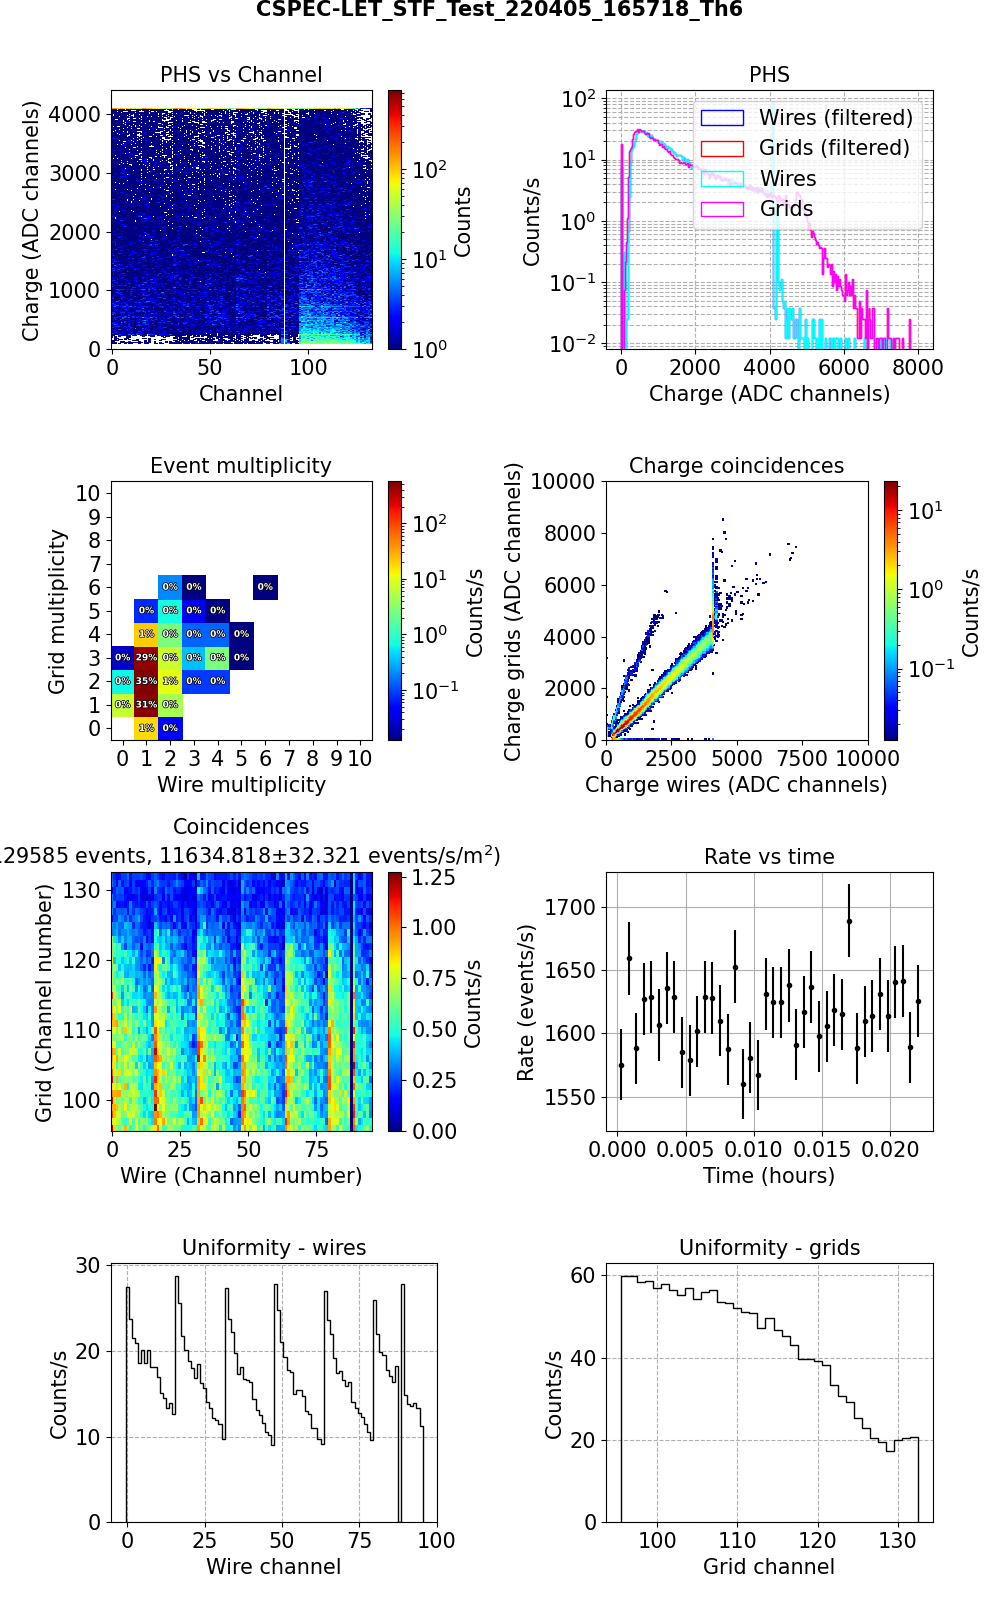

In [61]:
# Declare file name
file_name = 'CSPEC-LET_STF_Test_220405_165718_Th6'
raw_path = MG_RAW_FOLDER + file_name + '.zip'
# Declare area
mg_area = 0.025*0.025*6*37
# Extract and save (only has to be done once)
mg_manage.extract_and_save(file_name, MG_RAW_FOLDER, MG_PROCESSED_FOLDER)
# Load data
clu, ev = mg_manage.load_clusters_and_events(file_name, MG_PROCESSED_FOLDER)
# Filter data
clu_f = mg_manage.filter_data(clu, mg_filter)
# Plot data
mg_basic_plot.mg_plot_basic_bus(file_name, 9, clu, ev, mg_filter, mg_area, file_name)